## Softmax Classification

#### Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load original Iris dataset.
iris = datasets.load_iris()
old_X = iris.data
old_Y = iris.target

# Create the modified Iris dataset.
new_X = old_X[:,2:]       # We only use last 2 features.
new_Y = old_Y.reshape(-1,1)

X_train =      np.vstack([new_X[:35],   new_X[50:85],  new_X[100:135]])
Y_train = np.concatenate([new_Y[:35],   new_Y[50:85],  new_Y[100:135]])
X_test  =      np.vstack([new_X[35:50], new_X[85:100], new_X[135:]])
Y_test  = np.concatenate([new_Y[35:50], new_Y[85:100], new_Y[135:]])

print(X_train.shape)     # X_train.shape should be (105,2), which shows 
                         # 150 training points where each has 2 features.
print(Y_train.shape)     # Y_train.shape should be (105,1) which shows 105 
print(np.unique(Y_train))# points where each point has label 0, 1 or 2.

(105, 2)
(105, 1)
[0 1 2]


#### Visualization of Original Data

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

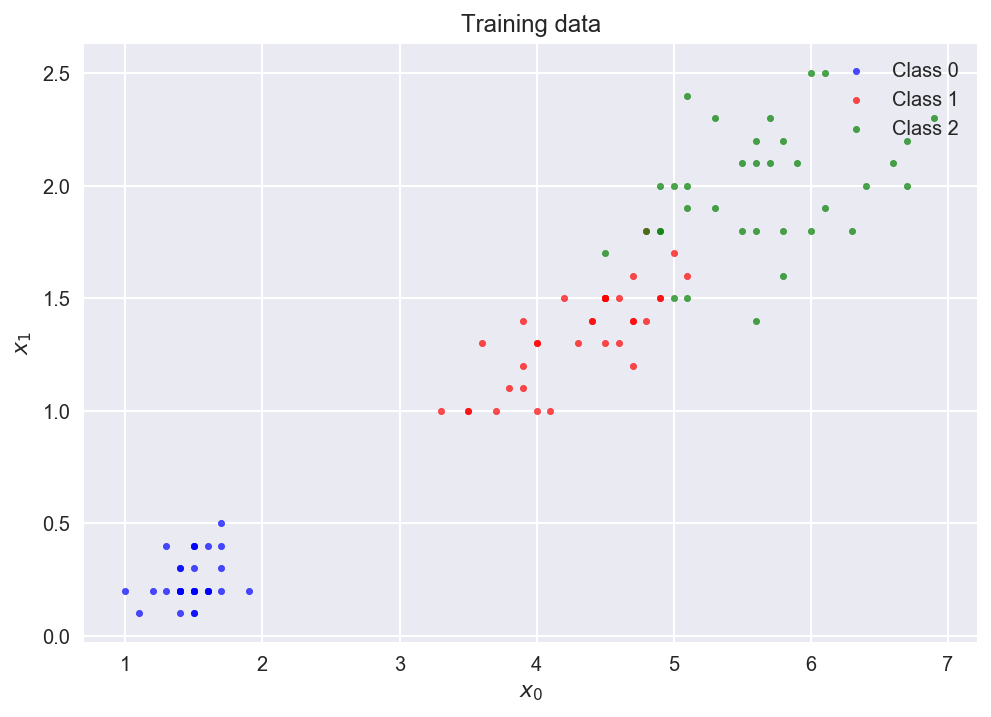

In [3]:
# Visualization of the training data.
mpl.style.use('seaborn')

fig = plt.figure()
plt.scatter(X_train[Y_train[:,0]==0, 0], X_train[Y_train[:,0]==0, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], X_train[Y_train[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')
plt.scatter(X_train[Y_train[:,0]==2, 0], X_train[Y_train[:,0]==2, 1], marker='o', color='g', alpha=0.7, s=10, label='Class 2')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()

#### Training Procedure

In [4]:
def softmax_P(X, W, b):
    """ Calculate the P (probability) matrix of softmax function.
    X: Feature matrix.   Shape: [n,D].
    W: Weight matrix.    Shape: [K,D].
    b: Bias vector.      Shape: [K,1].
    Return the P matrix. Shape: [n,K].
    """
    f         = W.dot(X.T) + b   # Shape: [K,n].
    f         = f - f.max(axis=0, keepdims=True)  # Avoid the big number 
    exp_f     = np.exp(f)        # Shape: [K,n].
    sum_exp_f = exp_f.sum(axis=0, keepdims=True)  # Shape: [1,n].
    P         = (exp_f / sum_exp_f).T
    return P

In [5]:
# Gradient of loss function: L'(W,b).
def L_prime(X, Y, W, b):
    """ L'(W,b) function. 
    X: Feature matrix. Shape: [n,D].
    Y: Label vector.   Shape: [n,1].
    W: Weight matrix.  Shape: [K,D].
    b: Bias vector.    Shape: [K,1].
    Return the gradients: dL/dW (Shape: [K,D]), dL/db (Shape: [K,1]).
    """
    # Get dimensions.
    K, D = W.shape
    n = X.shape[0]
    # Generate the one-hot encoding form of Y.
    #Y_onehot = np.zeros((n, K))                  # Shape: [n,K].
    #Y_onehot[np.arange(n), Y] = 1
    targets = Y.reshape(-1)
    Y_onehot = np.eye(3)[targets]

# Get the P matrix.
    P = softmax_P(X, W, b)                                      # Shape: [n,K].
    # Calculate the gradients: dL/dW, dL/db.
    dL_by_dW = (P-Y_onehot).T.dot(X)                  # Shape: [K,D].
    dL_by_db = (P-Y_onehot).T.dot(np.ones((n, 1)))   # Shape: [K,1].
    
    # Return the gradients.
    return dL_by_dW, dL_by_db

In [6]:
def L(X, Y, W, b):
    """ L(W,b) function. 
    X: Feature matrix. Shape: [n,D].
    Y: Label vector.   Shape: [n,1].
    W: Weight matrix.  Shape: [K,D].
    b: Bias vector.    Shape: [K,1].
    """
    # Get dimensions.
    K, D = W.shape
    n = X.shape[0]
    # Generate the one-hot encoding form of Y.
    #Y_onehot = np.zeros((n, K))                  # Shape: [n,K].
    #Y_onehot[np.arange(n), Y] = 1
    targets = Y.reshape(-1)
    Y_onehot = np.eye(3)[targets]
    # Get the P matrix.
    P =  softmax_P(X, W, b)                                        # Shape: [n,K].
    L =  -np.sum(Y_onehot * np.log(P))                                        # Shape: Scalar.
    return L

In [7]:
learning_rate = 0.0025
n_iter = 100000       # Number of iterations
K = 3                 # Number of classes.
D = X_train.shape[1]  # Number of feature dimensions
W = np.zeros((K,D))   # Weight matrix.
b = np.zeros((K,1))   # Bias vector.

# We will keep track of training loss over iterations.
iterations = [0]
L_list = [L(X_train, Y_train, W, b)]
for i in range(n_iter):
    gradient_W, gradient_b = L_prime(X_train, Y_train, W, b)
    W_new = W - learning_rate * gradient_W
    b_new = b - learning_rate * gradient_b
    iterations.append(i+1)
    L_list.append(L(X_train, Y_train, W_new, b_new))
    norm = np.abs(W_new-W).sum() + np.abs(b_new-b).sum()  # L1-norm as jumping out criteria.
    if norm < 0.0005:
        print("Gradient descent has converged after " + str(i) + " iterations.")
        break
    W = W_new
    b = b_new
    
print ('W matrix: \n' + str(W))
print ('b vector: \n' + str(b))

Gradient descent has converged after 32099 iterations.
W matrix: 
[[-3.40416004 -6.62538814]
 [-0.25031952 -0.40788509]
 [ 3.65447956  7.03327322]]
b vector: 
[[ 18.79108579]
 [  6.29487369]
 [-25.08595948]]


#### Training Loss Curve

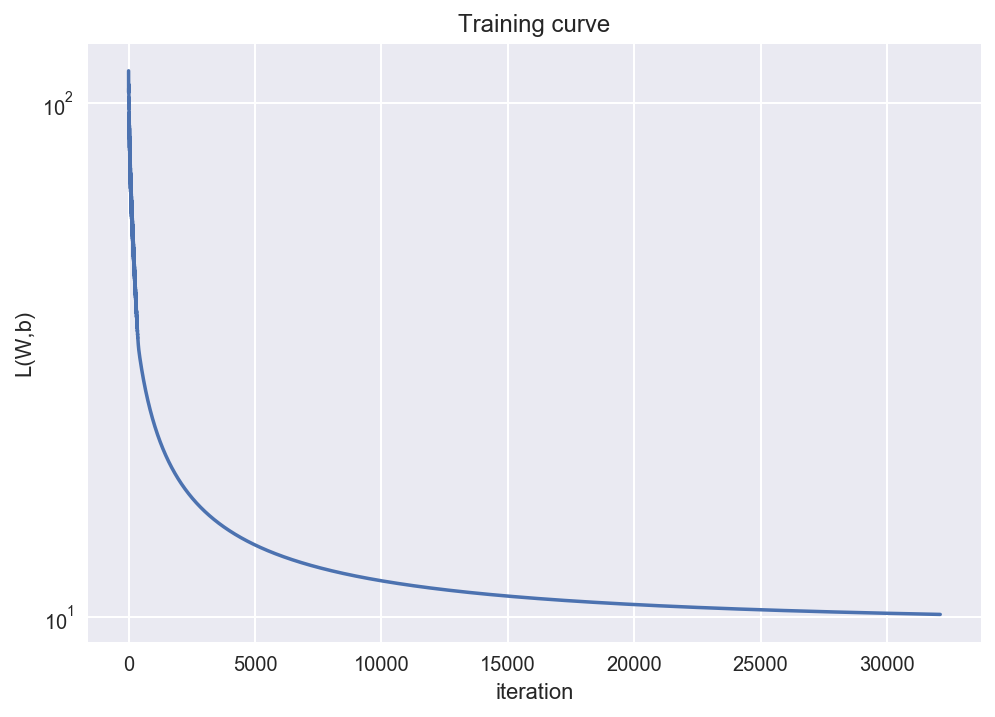

In [8]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(W,b)')
plt.semilogy(iterations, np.array(L_list).reshape(-1, 1))
plt.show()

#### Results on Training Data

In [9]:
# Prepare for decision boundary.
num = 100
X0_plane_range = np.linspace(1,7,num)
X1_plane_range = np.linspace(0,2.5,num)
X0_plane, X1_plane = np.meshgrid(X0_plane_range, X1_plane_range)
X_decision = np.stack([X0_plane.reshape(-1), X1_plane.reshape(-1)]).T
P_decision = softmax_P(X_decision, W, b) # Shape: [n,K].
yhat_decision = P_decision.argmax(axis=1).reshape(-1,1)

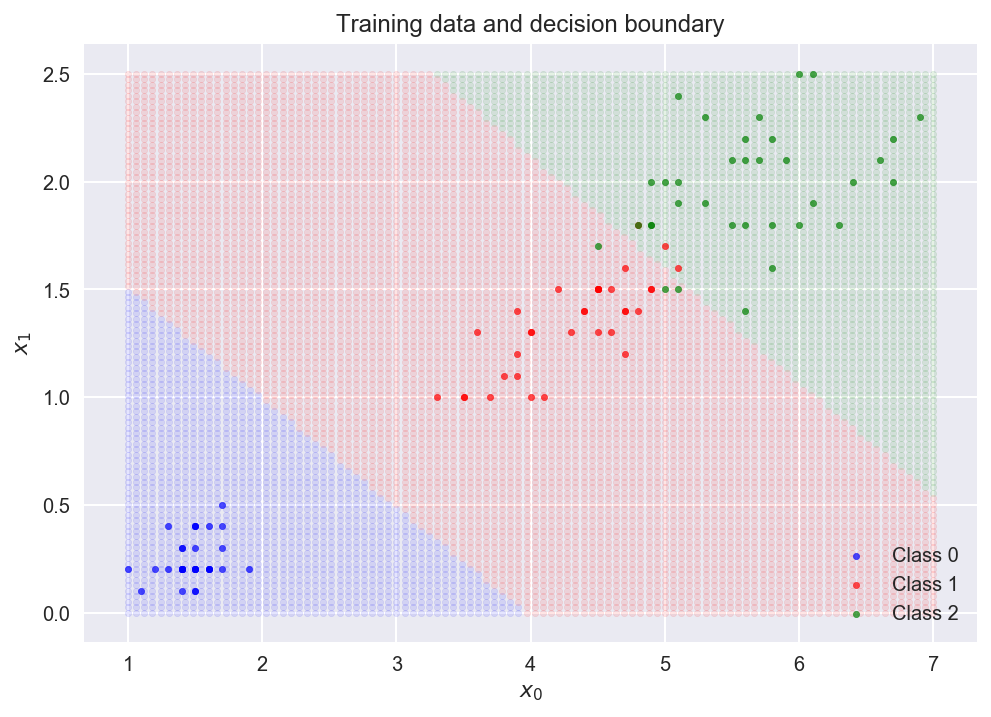

In [10]:
# Training data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], X_decision[yhat_decision[:,0]==0, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==2, 0], X_decision[yhat_decision[:,0]==2, 1], marker='o', color='g', alpha=0.1, s=10)

plt.scatter(X_train[Y_train[:,0]==0, 0], X_train[Y_train[:,0]==0, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_train[Y_train[:,0]==1, 0], X_train[Y_train[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')
plt.scatter(X_train[Y_train[:,0]==2, 0], X_train[Y_train[:,0]==2, 1], marker='o', color='g', alpha=0.7, s=10, label='Class 2')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

#### Results on Test Data

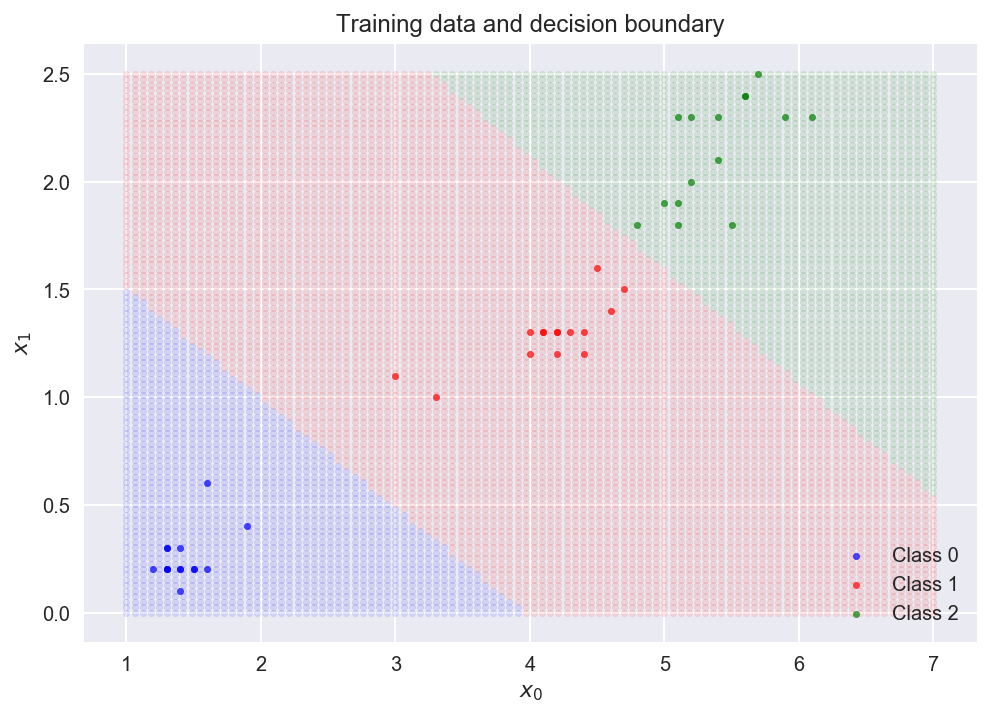

In [11]:
# Test data points and decision boundary. 
plt.scatter(X_decision[yhat_decision[:,0]==0, 0], X_decision[yhat_decision[:,0]==0, 1], marker='o', color='b', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==1, 0], X_decision[yhat_decision[:,0]==1, 1], marker='o', color='r', alpha=0.1, s=10)
plt.scatter(X_decision[yhat_decision[:,0]==2, 0], X_decision[yhat_decision[:,0]==2, 1], marker='o', color='g', alpha=0.1, s=10)

plt.scatter(X_test[Y_test[:,0]==0, 0], X_test[Y_test[:,0]==0, 1], marker='o', color='b', alpha=0.7, s=10, label='Class 0')
plt.scatter(X_test[Y_test[:,0]==1, 0], X_test[Y_test[:,0]==1, 1], marker='o', color='r', alpha=0.7, s=10, label='Class 1')
plt.scatter(X_test[Y_test[:,0]==2, 0], X_test[Y_test[:,0]==2, 1], marker='o', color='g', alpha=0.7, s=10, label='Class 2')


plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Training data and decision boundary')

plt.legend(loc='lower right', fontsize=10)

In [12]:
# Calculate the test error.
P_test = softmax_P(X_test, W, b) # Shape: [n,K].
yhat_test = P_test.argmax(axis=1).reshape(-1,1)
test_error = 1 - np.sum(yhat_test == Y_test) / Y_test.shape[0]
print('Test error: {}'.format(test_error))

Test error: 0.0
